In [1]:
# Import libraries
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
# Define the paths
base_dir = '/content/drive/MyDrive/Projects/Food Image Recognition/Dataset'

In [3]:
# Print the number of images for each type
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path):
        num_images = len(os.listdir(category_path))
        print(f"{category}: {num_images} images")

Banana: 990 images
Apple: 665 images
Mango: 600 images
Lemon: 613 images
Carrot: 581 images


In [4]:
# Split the dataset for training
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 2760 images belonging to 5 classes.
Found 689 images belonging to 5 classes.


In [5]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# Create your own model
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(5, activation='softmax')(x)

model = Model(base_model.input, x)

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
173/173 [==============================] - 31s 124ms/step - loss: 0.9480 - accuracy: 0.6848 - val_loss: 0.4676 - val_accuracy: 0.8258
Epoch 2/10
173/173 [==============================] - 11s 62ms/step - loss: 0.4519 - accuracy: 0.8283 - val_loss: 0.2837 - val_accuracy: 0.8955
Epoch 3/10
173/173 [==============================] - 10s 59ms/step - loss: 0.3224 - accuracy: 0.8859 - val_loss: 0.3153 - val_accuracy: 0.8926
Epoch 4/10
173/173 [==============================] - 11s 63ms/step - loss: 0.2334 - accuracy: 0.9239 - val_loss: 0.2979 - val_accuracy: 0.9013
Epoch 5/10
173/173 [==============================] - 10s 60ms/step - loss: 0.1800 - accuracy: 0.9388 - val_loss: 0.2231 - val_accuracy: 0.9303
Epoch 6/10
173/173 [==============================] - 10s 59ms/step - loss: 0.1596 - accuracy: 0.9435 - val_loss: 0.2183 - val_accuracy: 0.9245
Epoch 7/10
173/173 [==============================] - 11s 63ms/step - loss: 0.1479 - accuracy: 0.9504 - val_loss: 0.3952 - val_accuracy

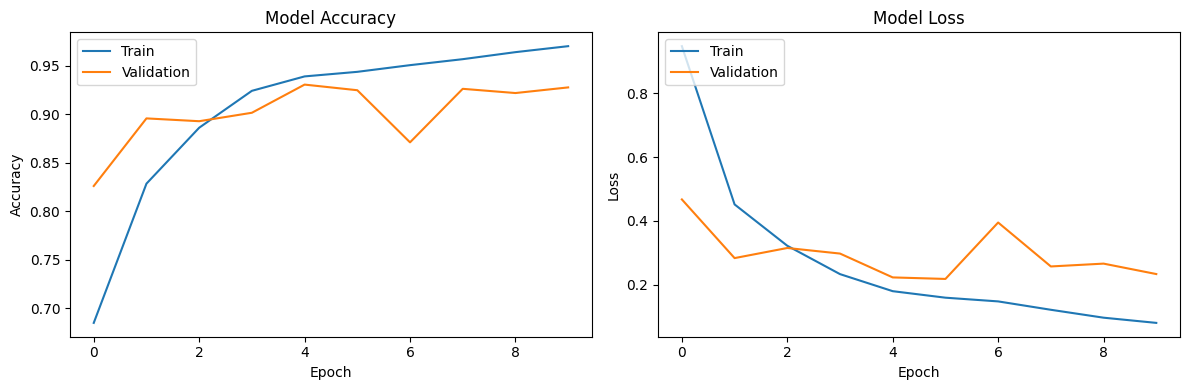

In [9]:
import matplotlib.pyplot as plt

# Plot the model graph
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Visualize training metrics
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [10]:
# Save the trained model
model.save('food_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# Load the trained model
loaded_model = tf.keras.models.load_model('food_classification_model.h5')

# Evaluate the model on the test set
evaluation = loaded_model.evaluate(test_generator)

# Print the evaluation metrics
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")
print(f"Test Loss: {evaluation[0]:.4f}")


Found 689 images belonging to 5 classes.
44/44 [==============================] - 3s 62ms/step - loss: 0.2336 - accuracy: 0.9274
Test Accuracy: 92.74%
Test Loss: 0.2336


In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

44/44 [==============================] - 2s 44ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.11      0.11       133
           1       0.27      0.29      0.28       198
           2       0.14      0.13      0.13       116
           3       0.15      0.14      0.14       122
           4       0.19      0.19      0.19       120

    accuracy                           0.18       689
   macro avg       0.17      0.17      0.17       689
weighted avg       0.18      0.18      0.18       689

Confusion Matrix:
[[14 49 28 26 16]
 [42 57 34 25 40]
 [18 39 15 26 18]
 [26 38 17 17 24]
 [29 31 16 21 23]]


**Model Prediction**

In [13]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import Markdown, display

In [14]:
print(train_generator.class_indices)

{'Apple': 0, 'Banana': 1, 'Carrot': 2, 'Lemon': 3, 'Mango': 4}


In [15]:
# Load the trained model
loaded_model = tf.keras.models.load_model('food_classification_model.h5')

# Class indices mapping
class_indices = {'Apple': 0, 'Banana': 1, 'Carrot': 2, 'Lemon': 3, 'Mango': 4}


In [16]:
def predict_food(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    prediction = loaded_model.predict(img_array)

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    # Get the predicted class name
    predicted_class_name = list(class_indices.keys())[list(class_indices.values()).index(predicted_class)]

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Print the predicted class name in bold
    display(Markdown(f"**Predicted Class Name: {predicted_class_name}**"))

1/1 [==============================] - 0s 147ms/step


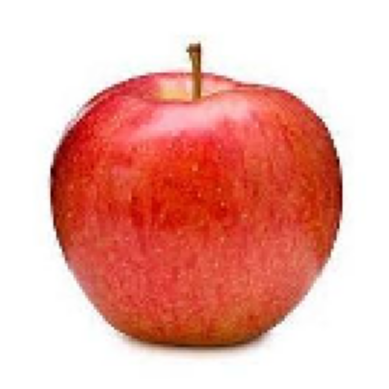

**Predicted Class Name: Apple**

In [17]:
image_path = '/content/drive/MyDrive/Projects/Food Image Recognition/Dataset/Apple/Apple15.jpg'
predict_food(image_path)

1/1 [==============================] - 0s 20ms/step


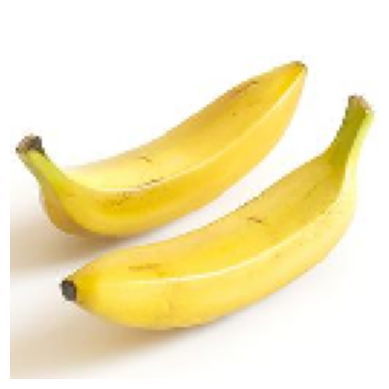

**Predicted Class Name: Banana**

In [18]:
image_path = '/content/drive/MyDrive/Projects/Food Image Recognition/Dataset/Banana/Banana575.jpg'
predict_food(image_path)

1/1 [==============================] - 0s 21ms/step


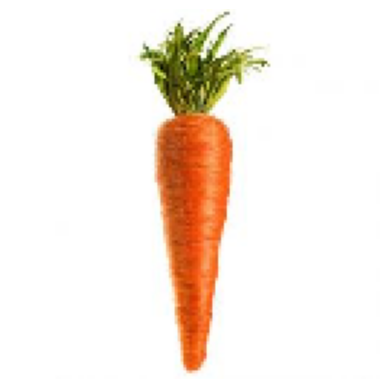

**Predicted Class Name: Carrot**

In [19]:
image_path = '/content/drive/MyDrive/Projects/Food Image Recognition/Dataset/Carrot/Carrot47.jpg'
predict_food(image_path)

1/1 [==============================] - 0s 25ms/step


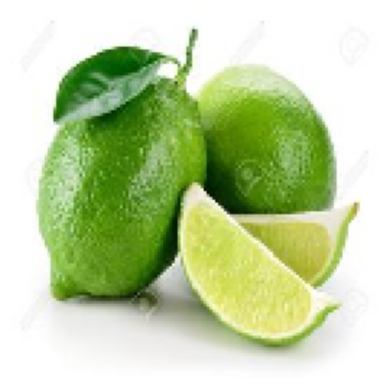

**Predicted Class Name: Lemon**

In [20]:
image_path = '/content/drive/MyDrive/Projects/Food Image Recognition/Dataset/Lemon/Lemon55.jpg'
predict_food(image_path)

1/1 [==============================] - 0s 22ms/step


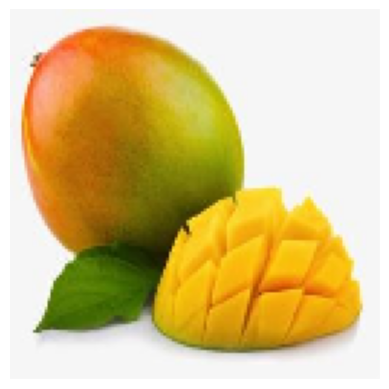

**Predicted Class Name: Mango**

In [21]:
image_path = '/content/drive/MyDrive/Projects/Food Image Recognition/Dataset/Mango/Mango84.jpg'
predict_food(image_path)